In [12]:
import numpy as np

# Exercise 1: Finite-precision arithmetic

## Part 1.  Explain the output of sys.float_info.


Run the following code snippet:

In [1]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

The float_info attribute outputs the following information about floating point representation in a single byte on a 64 bit computer:
1. **max / min**: the maximum(positive)/minimum(negative) floating point number that can be represented by a single byte
1. **max_exp/max_10_exp** : an integer x that can produce the maximum number that can be represented by a normalized float in the following manner : radix**(1-x) or 10**(x) respectively. Note radix is 2.
1. **min_exp/min_10_exp** : an integer x that can produce the minimum number that can be represented by a normalized float in the following manner : radix**(1-x) or 10**(x) respectively. Note radix is 2.
1. **dig/mant_dig** : The maximum number of decimal digits that can be faithfully represented in a float.
1. **mant_dig** : the number of base-radix(2) digits in the significand of a float.
1. **radix** : the base used for representing the float
1. **round** : flag for how python tries to round a floating number (nearest in this case)
1. **epsilon** : smallest value which can be added or subtracted to 1 such that the sum is faithfully representable by the float

## part 2:  Show how you can calculate the printed-out values max, min, epsilon yourself

According to the IEEE 754-1985 standard for a 64bit computer 
1. 1 bit is reserved for the sign of the float (sign bit), say a
1. 52 bits are used to represent the fraction of the float, say b
1. 11 bits are used to represent exponenet  of the float, say c
1. in addition float is represented in the normalized fashion, that is to say 1. is always assumed to be the first digit of the fraction
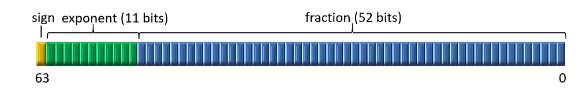

Each bit can either be 0 or 1.



For calculating the decimal number from the bit values the following formula can be used

$\pm M\cdot2^{E-e}$

$M=1.F$

where M is the mantissa E is the exponent and e is the bias. Bias, e, has a fixed value $(2^{11-1}-1=1023), 0<E<2^{2^{11}-2} $

### Calculating the epsilon

Epsilon is defined smallest fraction that can be added to 1 to arrive at the lowest fraction greater than 1.  For calulating epsilon M will be of the form $0.(000...)1$ 51x0s

What about the machine precision? The machine precision, M , is the
smallest possible number that can be added to one, and get a number larger
than one, i.e. 1 + M > 1. The smallest possible value of the mantissa is
0.000 . . . 01 = 2−52, thus the lowest number must be of the form 2−52 · 2m.
If the exponent , m, is lower than 0 then when we add this number to 1,
we will only get 1. Thus the machine precision is M = 2−52 = 2.22 · 10−16
(for 32 bits 2−23 = 1.19 · 10−7).

Q: why is the exponent ignored???

 Part 2.

    Show how you can calculate the printed-out values max, min, epsilon yourself (again, based on the IEEE standard).

## Part 3.

In Python, typing 0.1+0.2 does not (typically) produce the same output as 0.3.

    Why not?

## Part 4.

    Should you use the ==-operator to test whether two floating-point numbers are equal?
    Why / why not? Can you think of alternative ways to do floating-point number comparison

# Exercise 2: Get up to speed with NumPy

## Part 1.

The following code block gives an example of a vectorized function:

In [23]:
x = np.linspace(0, 1, 10)
ex=np.exp(x)  
emx=np.exp(-x)
x,ex,emx

(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 array([1.        , 1.11751907, 1.24884887, 1.39561243, 1.5596235 ,
        1.742909  , 1.94773404, 2.17662993, 2.43242545, 2.71828183]),
 array([1.        , 0.89483932, 0.8007374 , 0.71653131, 0.64118039,
        0.57375342, 0.51341712, 0.45942582, 0.41111229, 0.36787944]))

Notice the usage of np.exp instead of using the exponential function provided in the built-in math library; this is an example of a universal function.

1. Create a native Python list of the same size as x and holding the same values. Apply the same two function calls to the list. Explain what happens.

In [33]:
xx = [i/9 for i in range(10)]
exx=np.exp(xx)  
emxx=np.exp(-1*xx)
xx,exx,emxx

([0.0,
  0.1111111111111111,
  0.2222222222222222,
  0.3333333333333333,
  0.4444444444444444,
  0.5555555555555556,
  0.6666666666666666,
  0.7777777777777778,
  0.8888888888888888,
  1.0],
 array([1.        , 1.11751907, 1.24884887, 1.39561243, 1.5596235 ,
        1.742909  , 1.94773404, 2.17662993, 2.43242545, 2.71828183]),
 array([], dtype=float64))

**Explanation:** Multiplying -1(0 or lower) to a built in python array returns an empty array. 

In [34]:
xx = [i/9 for i in range(10)]
exx=np.exp(xx)  
emxx=np.exp(-xx)
xx,exx,emxx

TypeError: bad operand type for unary -: 'list'

**Explanation** : the operand '+' does not support addition of a list.

2. How would you generally evaluate a function on all elements of a native Python list? (as opposed to a NumPy array)

In [35]:
xx = [i/9 for i in range(10)]
exx=[np.exp(i) for i in xx]  
emxx=[np.exp(-i) for i in xx]
xx,exx,emxx

([0.0,
  0.1111111111111111,
  0.2222222222222222,
  0.3333333333333333,
  0.4444444444444444,
  0.5555555555555556,
  0.6666666666666666,
  0.7777777777777778,
  0.8888888888888888,
  1.0],
 [1.0,
  1.1175190687418637,
  1.2488488690016821,
  1.3956124250860895,
  1.5596234976067807,
  1.7429089986334578,
  1.9477340410546757,
  2.1766299317162483,
  2.4324254542872077,
  2.718281828459045],
 [1.0,
  0.8948393168143698,
  0.8007374029168081,
  0.7165313105737893,
  0.6411803884299546,
  0.5737534207374327,
  0.513417119032592,
  0.45942582403592663,
  0.41111229050718745,
  0.36787944117144233])

## Part 2.

As already hinted at, the NumPy library comes with a plethora of useful features and functions. The code snippets below show some examples: 

In [60]:
# Produce an array of size 20 with each element as 0

# numpy
np.zeros(20)

#native
[0]*20

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [61]:
# Produce an array of size 20 with each element as 1

#numpy
np.ones(20)

#native
[1]*20

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [63]:
# Produce a evenly spaced list of size 11, both the limits 0 and 10 are to be included 

#numpy
np.linspace(0, 10, 11)

#native
list(range(0,11))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [68]:
# from the numpy.linspace sourcecode
# div = (num - 1) if endpoint else num
# if endpoint is set to False, stop is excluded and 
# step is calculated by dividing by num instead of n-1

#numpy
np.linspace(0, 10, 11, endpoint=False,  retstep=True)

#native
[i*10/11 for i in range(11)]
np.linspace(0, 10, 11, endpoint=False,  retstep=False)-[i*10/11 for i in range(11)]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -8.88178420e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.77635684e-15])

In [69]:
# Produce a integer list [0,1,2,3,4], 
# add one to each element and multiply each element with 2

#numpy
vector = np.arange(5) + 1
2*vector

#native
[(i+1)*2 for i in range(5)]

[2, 4, 6, 8, 10]

## Part 3. 

In [70]:
array_of_numbers = np.array([4, 8, 15, 16, 23, 42,0,5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.')
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)
is_even_and_greater_than_17 = is_even & is_greater_than_17

There are 7 non-zero numbers in the array.


In [86]:
# the logical operator 'and' can only perform logical and operation between 2 elements 
# thus the first line returns an exception
# for lists '&' can be used to perform bitwise operations
# the second line tries to perform 'and' between '0' abd array_of numbers and fail
# second line can be fixed by adding braces around each comparision 

is_even_and_greater_than_17 = is_even and is_greater_than_17
print((array_of_numbers % 2 == 0) & (array_of_numbers > 17))
print(np.logical_and((array_of_numbers % 2 == 0),(array_of_numbers > 17)))

[False False False False False  True False False]
[False False False False False  True False False]


## Part 4. 

In [91]:
array_of_numbers

array([ 4,  8, 15, 16, 23, 42,  0,  5])

In [99]:
#return the index of the array where the condition is satisfied
np.where(array_of_numbers > 17)[0]

array([4, 5])

In [100]:
# return an array with 1 where condition is true and 0 where condition is false
np.where(array_of_numbers > 17, 1, 0)

array([0, 0, 0, 0, 1, 1, 0, 0])

# Exercise 3, Part I: Finite Differences (FD) with Functions

In scientific computing one often needs to calculate derivatives of functions. For problems encountered in practice, exact formulas may not be available, in which case numerical estimates are needed. However, to evaluate the correctness of our programmed numerical methods, it is still a very good idea to test the code on simple functions where the derivative is known.

In this exercise, we consider a function that is relevant for describing wave phenomenona:
\begin{equation*}
f(x) = \sin (b  x) \cdot e ^ {ax^2}
\label{eq:vector_ray} \tag{1}
\end{equation*}

Function **f** is defined by equation $\eqref{eq:vector_ray}$


SyntaxError: invalid character '⋅' (U+22C5) (1487563191.py, line 1)

One way to implement the function in Python is:

In [93]:
np.where?